In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [110]:
da= pd.read_csv('regression.csv')
da

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [111]:
da.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [112]:
y=da['GPA']
x1=da['SAT']

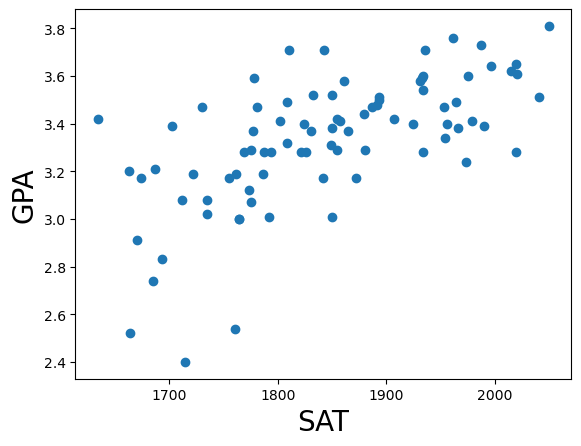

In [113]:
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [114]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.20e-11
Time:                        08:33:34   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
print(results.params)

const    0.275040
SAT      0.001656
dtype: float64


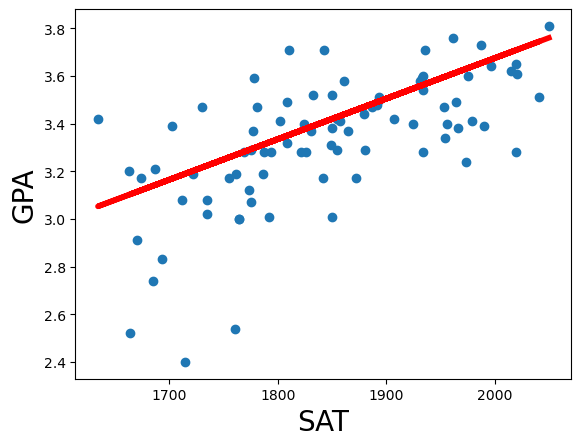

In [116]:
plt.scatter(x1,y) 
yhat= 0.0017*x1 + 0.275 
fig = plt.plot(x1,yhat,lw=4,c='red', label = 'regression line')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
plt.show()

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
train_x, test_x, train_y, test_y = train_test_split( x ,y,train_size = 0.8,random_state = 100 )

In [125]:
da_lm = sm.OLS( test_y, test_x ).fit()

In [126]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 800x600 with 0 Axes>

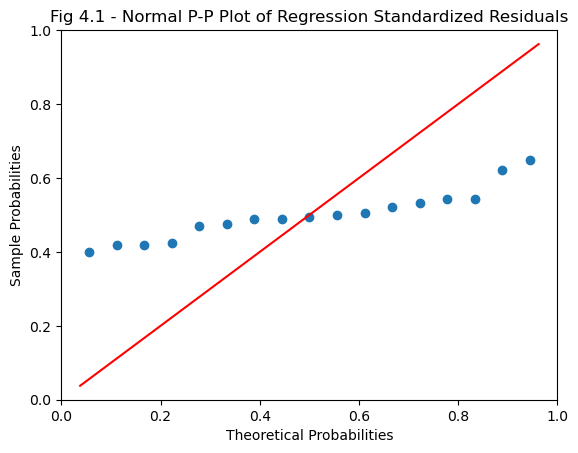

In [128]:
da_resid = da_lm.resid
probplot = sm.ProbPlot( da_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

In [129]:
from scipy.stats import zscore

In [132]:
da['z_score_gpa'] = zscore( da.GPA )

In [21]:
da['z_score_gpa']

0    -3.445384
1    -3.000932
2    -2.926857
3    -2.186104
4    -1.852765
        ...   
79    1.406549
80    1.406549
81    1.480624
82    1.591737
83    1.776926
Name: z_score_gpa, Length: 84, dtype: float64

Text(0, 0.5, 'Cooks Distance')

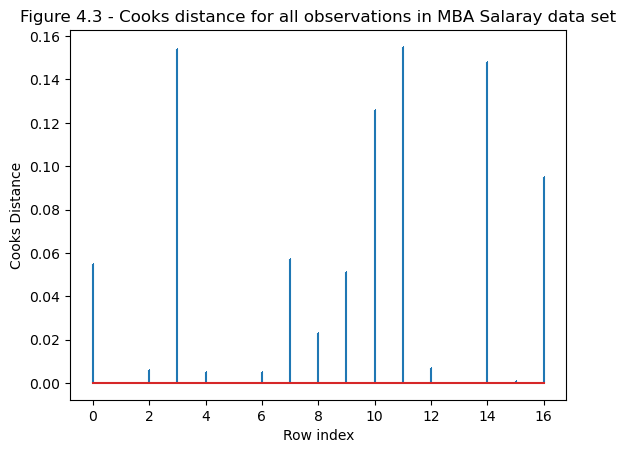

In [133]:
import numpy as np
da_influence = da_lm.get_influence()
(c, p) = da_influence.cooks_distance
plt.stem( np.arange( len( test_x) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Figure 4.3 - Cooks distance for all observations in MBA Salaray data set" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance")

In [134]:
pred_y = da_lm.predict( test_x )

In [75]:
pred_y

11    3.196140
51    3.331547
25    3.282462
5     3.018419
77    3.610823
72    3.534656
20    3.172444
22    3.006571
23    3.047193
81    3.554967
71    3.201218
80    3.255381
70    3.463568
26    3.216451
42    3.519423
29    3.228299
6     3.177522
dtype: float64

In [135]:
from sklearn.metrics import mean_absolute_percentage_error

In [136]:
np.abs(mean_absolute_percentage_error(test_y, pred_y))

0.037550700236359646

In [79]:
#suppress scientific notation
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = da_lm.get_influence()

In [137]:
#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)

(array([0.05487889, 0.00025291, 0.00631726, 0.15362534, 0.00475002,
       0.00002461, 0.00547504, 0.05661159, 0.02271879, 0.05147561,
       0.12570991, 0.15547649, 0.00742717, 0.00021106, 0.14801765,
       0.00070917, 0.09512027]), array([0.94678893, 0.99974713, 0.99370529, 0.85892548, 0.99526274,
       0.99997539, 0.99454191, 0.94516194, 0.97757091, 0.94999385,
       0.88278994, 0.85736899, 0.99260399, 0.99978897, 0.86366011,
       0.99929112, 0.9098076 ]))


In [138]:
mean_cooks = np.mean(cooks[0])
mean_cooks

0.052282458026423256